# Segmentasi citra Breast cancer image dengan metode dilasi dan erosi

### Load dataset

In [123]:
from skimage.filters import sobel,scharr,prewitt,roberts
from skimage import morphology
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
from sklearn.metrics import jaccard_similarity_score
import numpy as np
import cv2
import os
np.set_printoptions(threshold=np.nan)

### Setting path

In [93]:
DATA_PATH = 'Breast cancer images/Dataset'
GROUNT_PATH = 'Breast cancer images/Ground Truth'

### Load dataset

In [89]:
def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(DATA_PATH)):
        if img != "Thumbs.db" :
            path = os.path.join(DATA_PATH, img)
            print(path)
            img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            testing_data.append([np.array(img_data),int(img[:-4])])
    return testing_data

In [110]:
data = create_test_data()

Breast cancer images/Dataset\1.tif
Breast cancer images/Dataset\10.tif
Breast cancer images/Dataset\11.tif
Breast cancer images/Dataset\12.tif
Breast cancer images/Dataset\13.tif
Breast cancer images/Dataset\14.tif
Breast cancer images/Dataset\15.tif
Breast cancer images/Dataset\2.tif
Breast cancer images/Dataset\3.tif
Breast cancer images/Dataset\4.tif
Breast cancer images/Dataset\5.tif
Breast cancer images/Dataset\6.tif
Breast cancer images/Dataset\7.tif
Breast cancer images/Dataset\8.tif
Breast cancer images/Dataset\9.tif



### Membuat fungsi print

In [173]:
def printImage(data):
    plt.imshow(data, cmap='gray')
    plt.show()

### Fungsi segmentasi
#### Step-step:
1. Mencari bagian extreme dari gambar
1. Menginverse warna dari putih hitam ke hitam putih
1. Erosi menggunakan square dengan ukuran 3, berfungsi untuk menghilangkan noise
1. Dilasi menggunakan square dengan ukuran 3, berfungsi untuk memperjelas gambar dan memperhalus edge

In [187]:
def findSegmentation(data):
    gambar=np.array(data[0])
    squareEroted=morphology.square(3)
    squareDilated=morphology.square(3)
    
    histo = np.histogram(gambar, bins=np.arange(0, 256))
    
    printImage(gambar)
    
    # Step 1
    markers = np.zeros_like(gambar)
    
    markers[gambar < 50] = 0
    markers[gambar > 150] = 255
    
    
    # Step 2
    markers=np.invert(markers)
    
    
    printImage(markers)
    
    # Step 3
    eroted = morphology.erosion(markers,squareEroted)
    print("Erosi, menghilangkan noise")
    printImage(eroted)
    
    # Step 4
    dilated = morphology.dilation(eroted,squareDilated)
    print("Dilasi, memperjelas gambar dan memperhalus edge")
    printImage(dilated)
    

    
    
    return dilated

### Fungsi untuk menyatukan semua data image baru

In [80]:
def color(data):
    newData=[]
    for gambar in data:
        newGambar = findSegmentation(gambar)
        newData.append([newGambar,gambar[1]])
    return newData

### Eksekusi fungsi

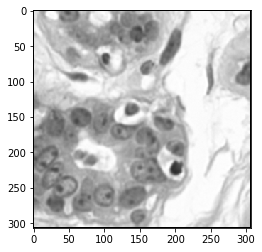

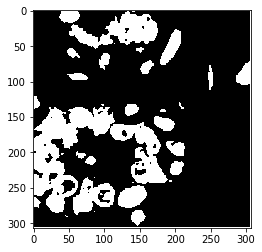

Erosi, menghilangkan noise


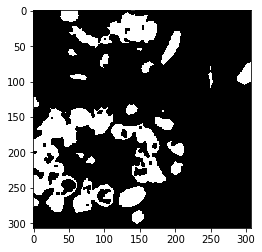

Dilasi, memperjelas gambar dan memperhalus edge


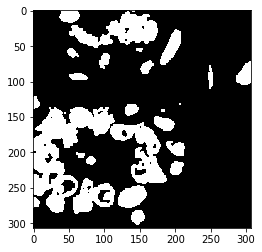

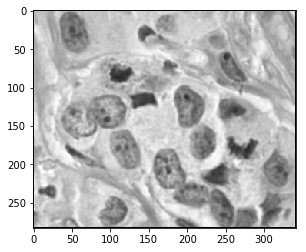

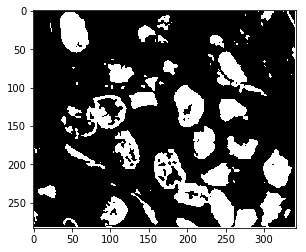

Erosi, menghilangkan noise


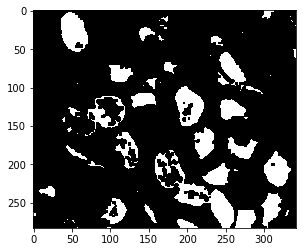

Dilasi, memperjelas gambar dan memperhalus edge


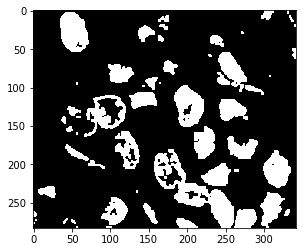

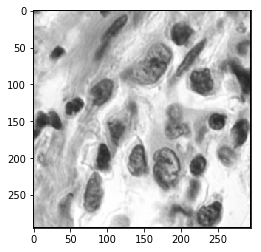

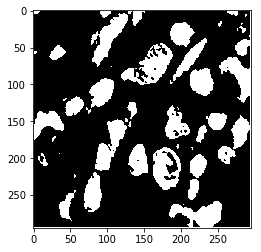

Erosi, menghilangkan noise


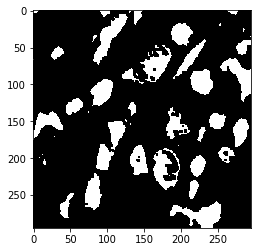

Dilasi, memperjelas gambar dan memperhalus edge


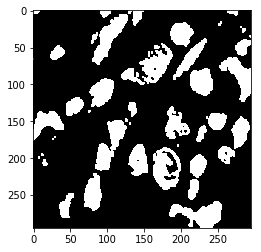

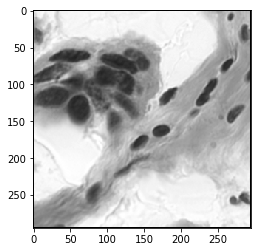

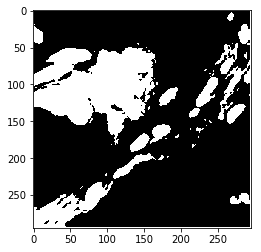

Erosi, menghilangkan noise


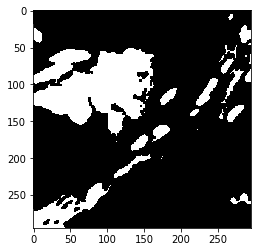

Dilasi, memperjelas gambar dan memperhalus edge


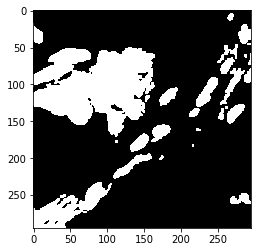

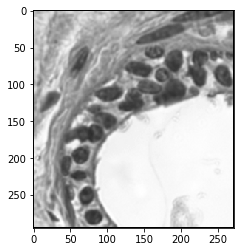

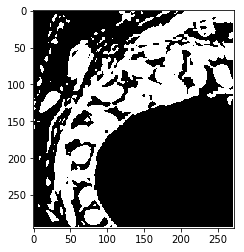

Erosi, menghilangkan noise


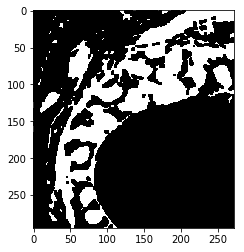

Dilasi, memperjelas gambar dan memperhalus edge


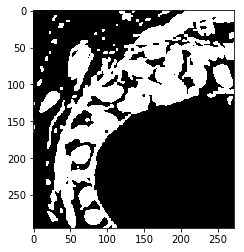

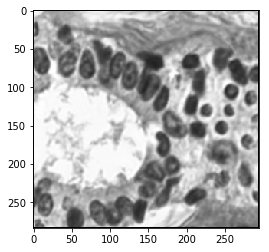

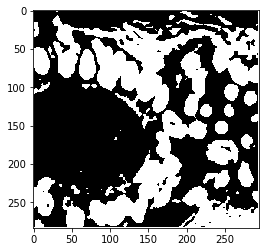

Erosi, menghilangkan noise


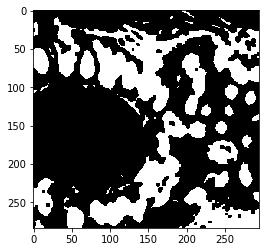

Dilasi, memperjelas gambar dan memperhalus edge


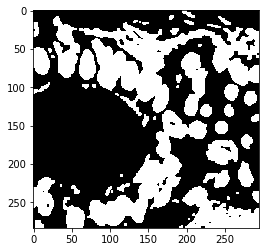

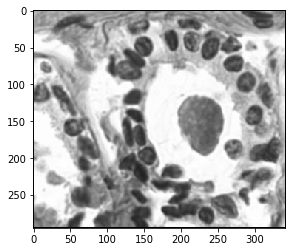

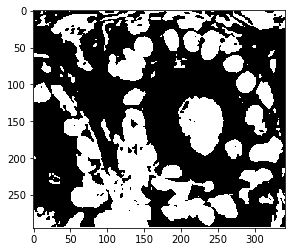

Erosi, menghilangkan noise


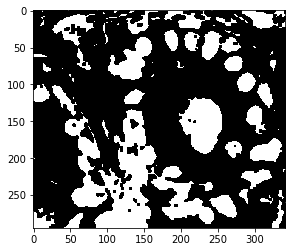

Dilasi, memperjelas gambar dan memperhalus edge


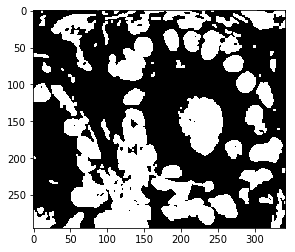

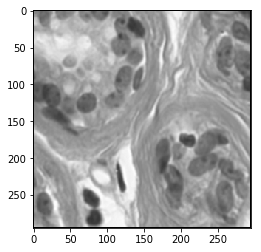

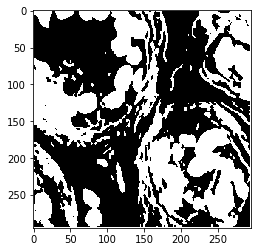

Erosi, menghilangkan noise


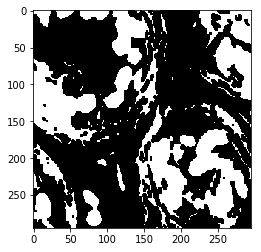

Dilasi, memperjelas gambar dan memperhalus edge


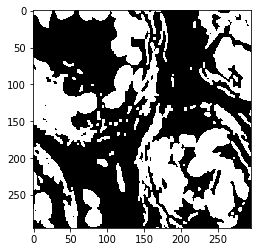

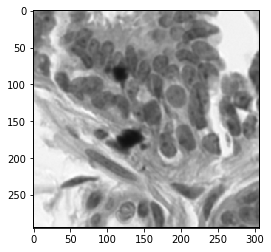

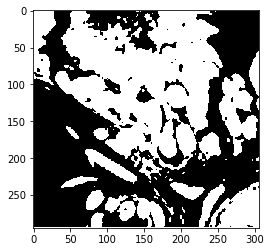

Erosi, menghilangkan noise


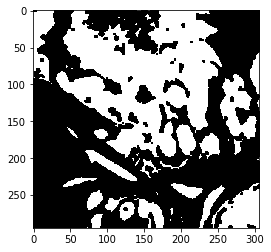

Dilasi, memperjelas gambar dan memperhalus edge


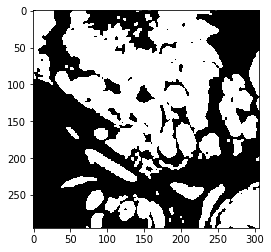

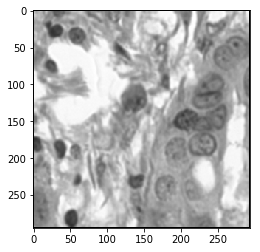

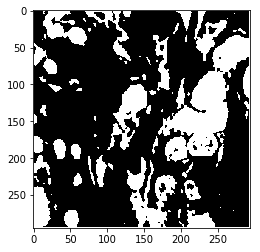

Erosi, menghilangkan noise


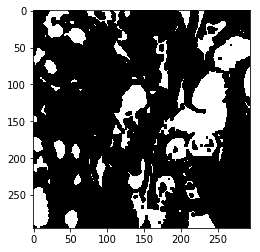

Dilasi, memperjelas gambar dan memperhalus edge


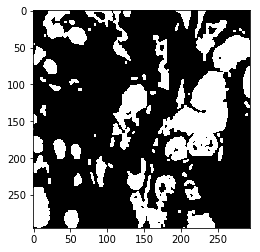

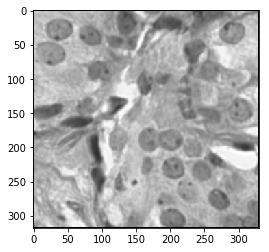

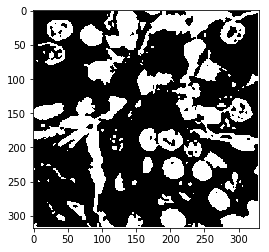

Erosi, menghilangkan noise


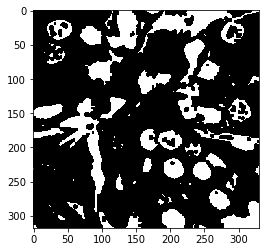

Dilasi, memperjelas gambar dan memperhalus edge


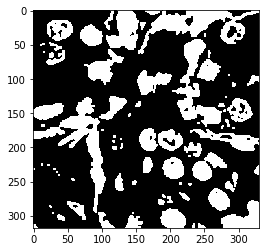

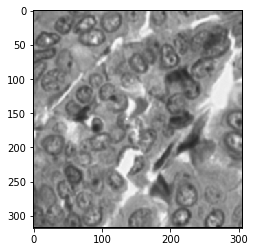

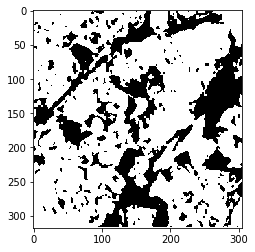

Erosi, menghilangkan noise


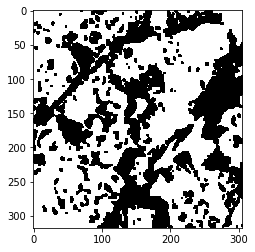

Dilasi, memperjelas gambar dan memperhalus edge


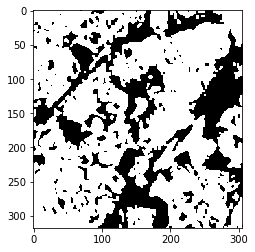

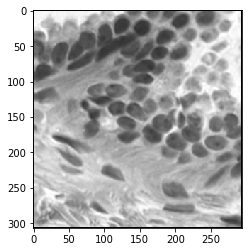

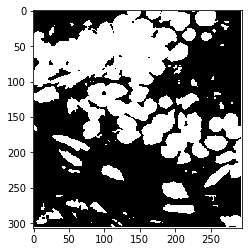

Erosi, menghilangkan noise


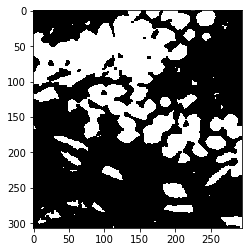

Dilasi, memperjelas gambar dan memperhalus edge


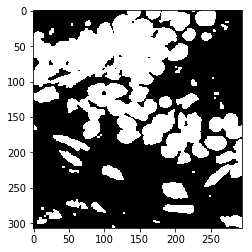

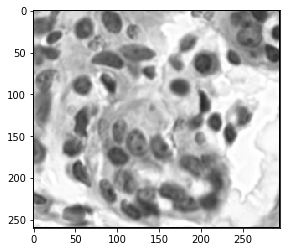

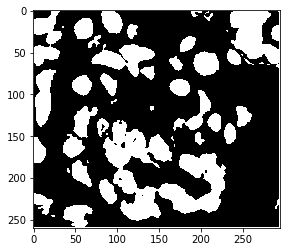

Erosi, menghilangkan noise


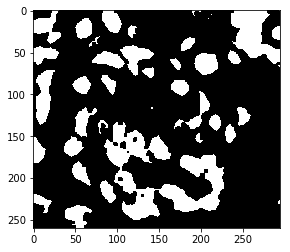

Dilasi, memperjelas gambar dan memperhalus edge


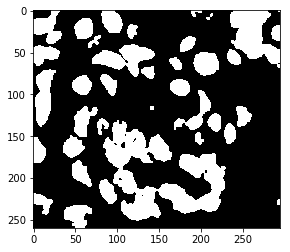

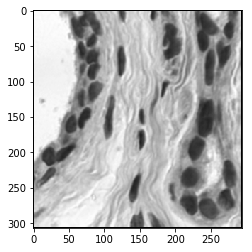

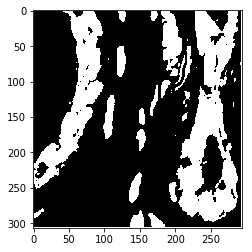

Erosi, menghilangkan noise


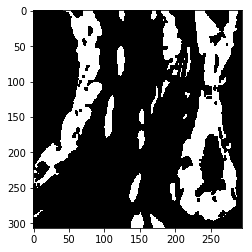

Dilasi, memperjelas gambar dan memperhalus edge


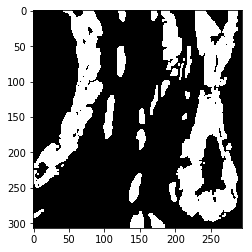

In [184]:
newData = color(data)

### Load data ground truth untuk evaluasi

In [185]:
testing_data=[]
for img in tqdm(newData):
    nama=str(img[1]+58)+".tif"
    path = os.path.join(GROUNT_PATH, nama)
    img_data = cv2.imread(path,0)
    img_data = cv2.resize(img_data,(img[0].shape[1],img[0].shape[0]))
    testing_data.append([np.array(img_data),np.array(img[0]),img[1],nama])

### Evaluasi menggunakan jaccard m

In [186]:
hasil=[]
for test in testing_data:
    y_truth=test[0].ravel()
    y_predict=test[1].ravel()
    res=jaccard_similarity_score(y_true=y_truth,y_pred=y_predict)
    hasil.append(res)
    print("Akurasi untuk gambar ke-"+str(test[2])+" data test = ("+ nama +") adalah "+str(res))
    

Akurasi untuk gambar ke-1 data test = (67.tif) adalah 0.8707996901823892
Akurasi untuk gambar ke-10 data test = (67.tif) adalah 0.8319901638666749
Akurasi untuk gambar ke-11 data test = (67.tif) adalah 0.8823441539787418
Akurasi untuk gambar ke-12 data test = (67.tif) adalah 0.8772191898879632
Akurasi untuk gambar ke-13 data test = (67.tif) adalah 0.7973454636091725
Akurasi untuk gambar ke-14 data test = (67.tif) adalah 0.7920028646455001
Akurasi untuk gambar ke-15 data test = (67.tif) adalah 0.7754683318465656
Akurasi untuk gambar ke-2 data test = (67.tif) adalah 0.7427520827348463
Akurasi untuk gambar ke-3 data test = (67.tif) adalah 0.7689173521779937
Akurasi untuk gambar ke-4 data test = (67.tif) adalah 0.8272685345324571
Akurasi untuk gambar ke-5 data test = (67.tif) adalah 0.7919382504288165
Akurasi untuk gambar ke-6 data test = (67.tif) adalah 0.583651909401077
Akurasi untuk gambar ke-7 data test = (67.tif) adalah 0.8183293766907745
Akurasi untuk gambar ke-8 data test = (67.tif)